# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question
Your task as a Data Scientist working for Champagne Company is to perform wine segmentation from the 
chemical analysis of wines grown in the same region in Kenya but derived from three different cultivars.
Perform statistical analysis on the clusters
highlighting key findings and making recommendations on business decisions based on
your findings.

### b) Defining the Metric for Success

We will have succeeded if we can can cluster the wine into segments that iad the company in pricing to meet their customer demands

### c) Understanding the Context 
Champagne Company is a leading wine company that specializes in the importation and
distribution of premium and super-premium wines, champagnes, and spirits within the
East African region. The main goal of the company is to make the most exclusive brands
of wine more accessible at an affordable price. The company wants to satisfy the
growing local demand for specialized products and the ever-increasing tourism industry
where guests don´t want to settle for less.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

The data provided was relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [50]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#loading our dataset
df=pd.read_csv('https://bit.ly/2UBJERh')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [53]:
#checking datasets statistical measures
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [54]:
#checking for missing values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no missing values

In [55]:
#checking for duplicates
df.duplicated().sum()

0

there are no duplicates

In [56]:
#select all the values and store them in an array containing 
# a matrix that will contain our features. 
# This matrix will then be passed to our algorithm for clustering.
X = df.iloc[:,].values
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [57]:
#Feature scaling

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X) 
X = norm.transform(X)

# 3.Clustering

#### K-means Clustering

In [58]:
from sklearn.cluster import KMeans

clusterer = KMeans(3, random_state=0)

clusterer.fit(X)

df['kmeans_cluster'] = clusterer.predict(X)

clusterer.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

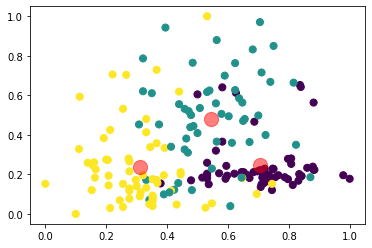

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=df['kmeans_cluster'], s=50, cmap='viridis')

centers = clusterer.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

plt.show()

In [60]:
df.sample(20)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster
129,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,2
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,2
153,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672,2
120,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625,2
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,2
72,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,2
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530,1
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750,2


In [61]:
df['kmeans_cluster'].value_counts()

2    62
0    61
1    55
Name: kmeans_cluster, dtype: int64

In [62]:
cluster_0 = df[df.kmeans_cluster.isin([0])]
cluster_0.head()

cluster_0.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.0
mean,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344,0.0
std,0.491826,0.681215,0.226533,3.011894,13.184732,0.341341,0.401444,0.069745,0.442083,1.302997,0.119449,0.360331,219.605634,0.0
min,12.470000,1.350000,2.040000,11.200000,89.000000,2.200000,2.190000,0.170000,1.250000,2.600000,0.820000,2.510000,680.000000,0.0
25%,13.300000,1.660000,2.290000,16.000000,98.000000,2.600000,2.680000,0.250000,1.660000,4.500000,1.010000,2.870000,985.000000,0.0
50%,13.740000,1.760000,2.440000,17.000000,105.000000,2.800000,2.970000,0.290000,1.920000,5.400000,1.070000,3.170000,1080.000000,0.0
75%,14.100000,1.920000,2.610000,18.800000,115.000000,3.000000,3.240000,0.320000,2.100000,6.200000,1.130000,3.440000,1280.000000,0.0
max,14.830000,4.040000,3.220000,30.000000,162.000000,3.880000,3.930000,0.500000,3.280000,8.900000,1.310000,4.000000,1680.000000,0.0


In [63]:
cluster_1 = df[df.kmeans_cluster.isin([1])]
cluster_1.head()

cluster_1.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0
mean,13.099818,3.160909,2.407455,21.043636,98.654545,1.689818,0.847818,0.457818,1.133636,6.936545,0.716836,1.709273,624.854545,1.0
std,0.529687,1.179373,0.195554,2.487879,11.082549,0.369902,0.332118,0.123178,0.426950,2.499873,0.150754,0.271169,123.684398,0.0
min,12.200000,0.940000,1.980000,16.000000,80.000000,0.980000,0.340000,0.170000,0.410000,3.050000,0.480000,1.270000,372.000000,1.0
25%,12.735000,2.485000,2.280000,19.500000,89.000000,1.405000,0.590000,0.400000,0.830000,4.960000,0.595000,1.555000,520.000000,1.0
50%,13.080000,3.240000,2.360000,21.000000,97.000000,1.650000,0.750000,0.480000,1.100000,7.100000,0.700000,1.680000,625.000000,1.0
75%,13.485000,3.890000,2.560000,22.500000,106.000000,1.865000,1.095000,0.530000,1.375000,8.835000,0.795000,1.845000,695.000000,1.0
max,14.340000,5.650000,2.860000,27.000000,123.000000,2.800000,1.590000,0.630000,2.700000,13.000000,1.250000,2.470000,880.000000,1.0


In [64]:
cluster_2 = df[df.kmeans_cluster.isin([2])]
cluster_2.head()

cluster_2.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans_cluster
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,12.213226,1.938710,2.244355,20.298387,92.790323,2.293871,2.152581,0.348226,1.669839,3.011452,1.062419,2.877903,497.274194,2.0
std,0.530774,1.022096,0.331314,3.200486,14.045753,0.520804,0.693858,0.113809,0.540226,0.896783,0.204664,0.410690,133.029292,0.0
min,11.030000,0.740000,1.360000,10.600000,70.000000,1.380000,0.570000,0.130000,0.420000,1.280000,0.690000,1.820000,278.000000,2.0
25%,11.840000,1.260000,1.992500,18.200000,86.000000,1.927500,1.705000,0.262500,1.350000,2.462500,0.930000,2.532500,395.500000,2.0
50%,12.190000,1.645000,2.240000,20.000000,88.000000,2.200000,2.065000,0.340000,1.620000,2.825000,1.045000,2.915000,476.000000,2.0
75%,12.420000,2.152500,2.450000,22.000000,97.750000,2.590000,2.522500,0.427500,1.892500,3.395000,1.212500,3.167500,600.250000,2.0
max,13.860000,5.800000,3.230000,28.500000,151.000000,3.520000,5.080000,0.660000,3.580000,6.000000,1.710000,3.690000,886.000000,2.0


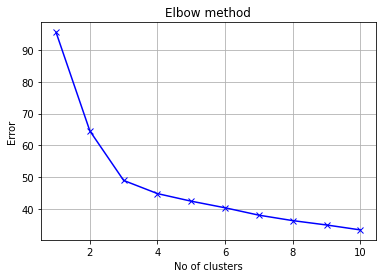

In [66]:
# Elbow Method

# Checking the optimal values of K for our dataset through the use of the elbow method

Error = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

# We plot our elbow method visualisation: No. of clusters vs Error

plt.plot(range(1, 11), Error, 'bx-')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.grid(True);

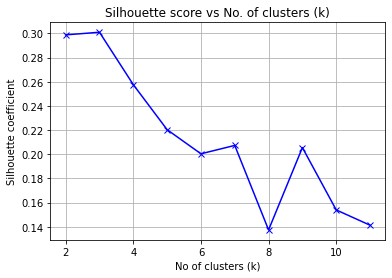

In [67]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score
silhouette = []

K = range(2, 12)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X) 
    silhouette.append(silhouette_score(X, kmeans.labels_))

# Plotting Silhouette
 
plt.plot(range(2, 12), silhouette, 'bx-')
plt.title('Silhouette score vs No. of clusters (k)')
plt.xlabel('No of clusters (k)')
plt.ylabel('Silhouette coefficient')
plt.grid(True);    

Using both elbow and silhouette method 3 is the optimal number of best segments for this data set which is what we used in our K means clustering above

#### Agglomerative Clustering

In [75]:
df=pd.read_csv('https://bit.ly/2UBJERh')

X = df.iloc[:,].values
X

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X) 
X = norm.transform(X)

from sklearn.cluster import AgglomerativeClustering

Agglomerative_clusterer = AgglomerativeClustering().fit(X) 

labels = Agglomerative_clusterer.labels_
labels

df['Agglomerative_cluster_group'] = labels

df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Agglomerative_cluster_group
40,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795,0
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380,0
105,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315,0
43,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.00,680,0
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020,0
89,12.08,1.33,2.30,23.6,70,2.20,1.59,0.42,1.38,1.74,1.07,3.21,625,0
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,1
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,1
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,0
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,0


In [76]:
df['Agglomerative_cluster_group'].value_counts()

0    128
1     50
Name: Agglomerative_cluster_group, dtype: int64

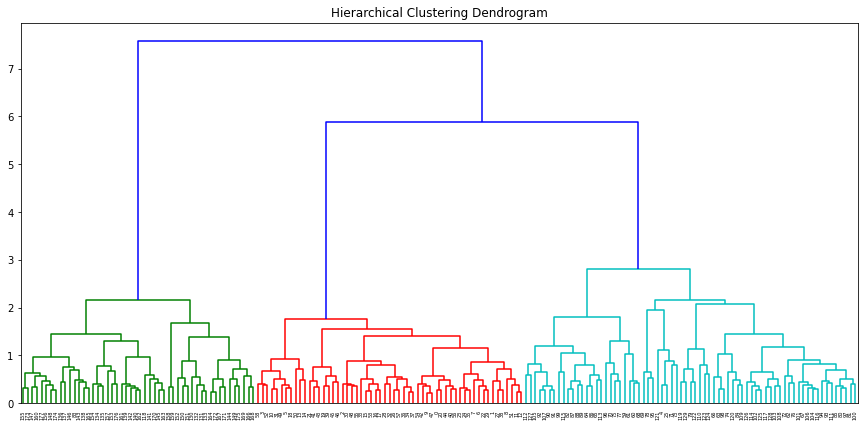

In [77]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 7))
plt.title("Hierarchical Clustering Dendrogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

Agglomerative clustering segments our data into two clusters

#### Density Based Clustering

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


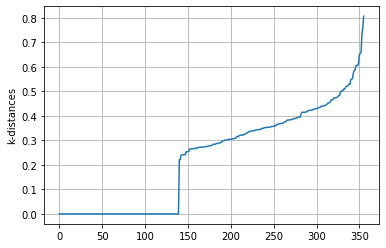

In [78]:
def k_distances2(x, k):
    dim0 = X.shape[0]
    dim1 = X.shape[1]
    p=-2*X.dot(x.T)+np.sum(X**2, axis=1).T+ np.repeat(np.sum(X**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm
m, m2= k_distances2(X, 2)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

We will use 0.45 as the epsilon value ie The maximum distance between two samples for one to be considered as in the neighborhood of the other.

In [80]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.45)

clustering.fit(X)

# labels = clusterer.labels_

df['density_cluster'] = clustering.labels_



In [81]:
df['density_cluster'].value_counts()

 0    88
-1    49
 1    41
Name: density_cluster, dtype: int64

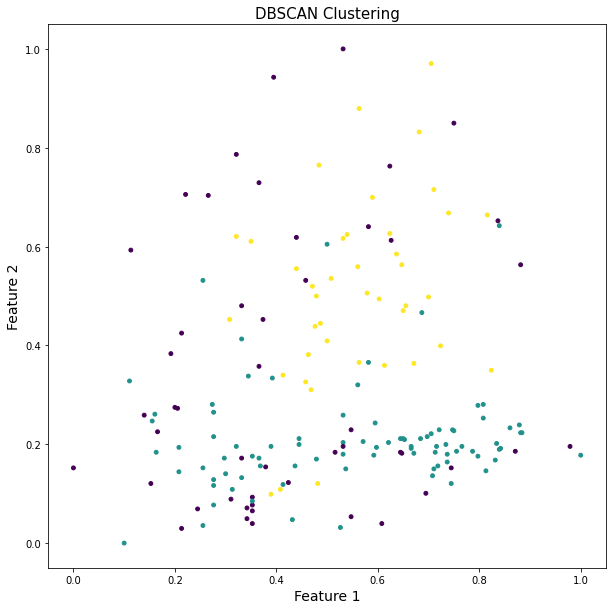

In [84]:
# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1],c=df['density_cluster'],cmap='viridis',s=15)
plt.title('DBSCAN Clustering',fontsize=15)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


DBSCAN segments our data into 3 clusters

#### Distribution based clustering

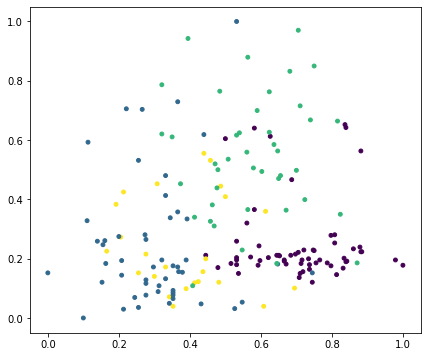

In [94]:
df=pd.read_csv('https://bit.ly/2UBJERh')

X = df.iloc[:,].values
X

# Performing normalisation
from sklearn.preprocessing import MinMaxScaler 
norm = MinMaxScaler().fit(X) 
X = norm.transform(X)

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(X)

#predictions from gmm
df['gmm_cluster'] =  gmm.predict(X)

#plotting the scatter plot
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1],c=df['gmm_cluster'],cmap='viridis',s=15)


In [91]:
df['gmm_cluster'].value_counts()

1    61
2    57
3    31
0    29
Name: gmm_cluster, dtype: int64

guassian distribution segments our data into 4 clusters, the data points are quite sparse though

# 3.Conclusion and Recommendation

K- means has a better segmentation of the data into 3 clusters which are confirmed by th elbow and silhouette methods and i'd there recommend it